<a href="https://colab.research.google.com/github/infizest/M602---Python/blob/main/Carbon_Footprint_Monitoring_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carbon Footprint Monitoring Tool

# Step 1: Install & Import Required Libraries


In [ ]:
!pip install pandas openpyxl matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load & Inspect the Dataset



*   Loads the Excel dataset.
*   Displays the first few rows to verify structure.
*   Shows all column names to understand available data.



In [ ]:
#CO2 dataset
file_path = '/content/owid-co2-data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure
print("Dataset Preview:")
print(df.head())
print("\nColumn Names:")
print(df.columns)

Dataset Preview:
       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                        

# Step 3: Data Cleaning & Handling Missing Values

Fills missing values with 0 (to avoid errors).

Converts column names to lowercase (for easy reference).

Ensures data consistency before analysis.

In [ ]:
# Replace NaN values with 0
df.fillna(0, inplace=True)

#column names to lowercase
df.columns = df.columns.str.lower()

# Check for missing values after cleaning
print("\nMissing Values Count (after cleaning):")
print(df.isnull().sum())


Missing Values Count (after cleaning):
country                        0
year                           0
iso_code                       0
population                     0
gdp                            0
                              ..
temperature_change_from_n2o    0
total_ghg                      0
total_ghg_excluding_lucf       0
trade_co2                      0
trade_co2_share                0
Length: 79, dtype: int64


# Step 4: Define Function for Generating Carbon Footprint Report

Filters dataset based on user input such as country & year.

Checks if data exists.

Extracts CO2 emissions and saves a report in CSV format.

In [ ]:
def generate_report(country: str, year: int):
    """
    Generates a Carbon Footprint report for a given country and year.
    """
    # Filter dataset for the selected country and year
    filtered_data = df[(df['country'] == country) & (df['year'] == year)]

    # If no data is found, return a message
    if filtered_data.empty:
        return f"No data available for {country} in {year}."

    # Extract CO2 emissions
    total_emissions = filtered_data['co2'].values[0]

    # Display the report
    print(f"Carbon Footprint Report for {country} in {year}:")
    print(f"Total CO2 Emissions: {total_emissions} metric tons")

    # Save the report as a CSV file
    report_data = pd.DataFrame({'Country': [country], 'Year': [year], 'CO2 Emissions': [total_emissions]})
    report_filename = f"carbon_report_{country}_{year}.csv"
    report_data.to_csv(report_filename, index=False)

    print(f"Report saved as: {report_filename}")


# User inputs to Genared the Report of the specific Country and year

In [ ]:
user_country = "Germany"
user_year = 2020
generate_report(user_country, user_year)

Carbon Footprint Report for Germany in 2020:
Total CO2 Emissions: 648.357 metric tons
Report saved as: carbon_report_Germany_2020.csv


# Step 5: Define Function for Visualizing CO2 Emission Trends

Plots a line graph showing CO2 trends over the years.

Handles missing data gracefully.

Uses Matplotlib for visualization.

In [ ]:
def plot_trends(country: str):
    """

    """
    # Filter data for the given country
    country_data = df[df['country'] == country]

    # If no data is found, return a message
    if country_data.empty:
        print(f"No data available for {country}.")
        return

    # Plot the data
    plt.figure(figsize=(10, 5))
    plt.plot(country_data['year'], country_data['co2'], marker='o', linestyle='-', color='blue')
    plt.title(f'CO2 Emission Trends in {country}')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (metric tons)')
    plt.grid(True)

    # Show the plot
    plt.show()



# Step 6: Handle Invalid User Input Gracefully

Ensures users only enter valid country & year.

Provides error messages for incorrect inputs.

Loops until a valid entry is received.

Enter country name: Germany
Enter year (e.g., 2020): 2021
Carbon Footprint Report for Germany in 2021:
Total CO2 Emissions: 678.777 metric tons
Report saved as: carbon_report_Germany_2021.csv


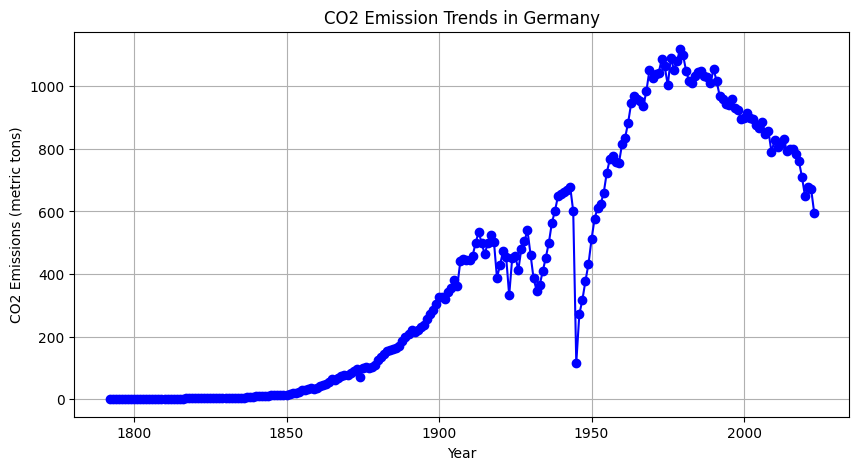

In [ ]:
def get_valid_input():
    """
    Ensures the user provides a valid country and year from the dataset.
    """
    available_countries = df['country'].unique()

    while True:
        country = input("Enter country name: ").strip()
        if country in available_countries:
            break
        print("Invalid country. Please try again.")

    while True:
        try:
            year = int(input("Enter year (e.g., 2020): "))
            if year in df['year'].unique():
                break
            else:
                print("Year not available in the dataset. Try again.")
        except ValueError:
            print("Invalid year format. Enter a numeric value.")

    return country, year

# Example Usage:
user_country, user_year = get_valid_input()
generate_report(user_country, user_year)
plot_trends(user_country)
